In [1]:
import read_mcmc
from importlib import reload

# Log Likelihood
$\hat{y}

# Accidentally ran this on all m12s
Gaussian priors using the best estimates and covariance matrix from least squares minimization

burn-in: 102
thin: 24

samples shape: (4032, 5)
burn-in: 102
thin: 24

samples shape: (4032, 5)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

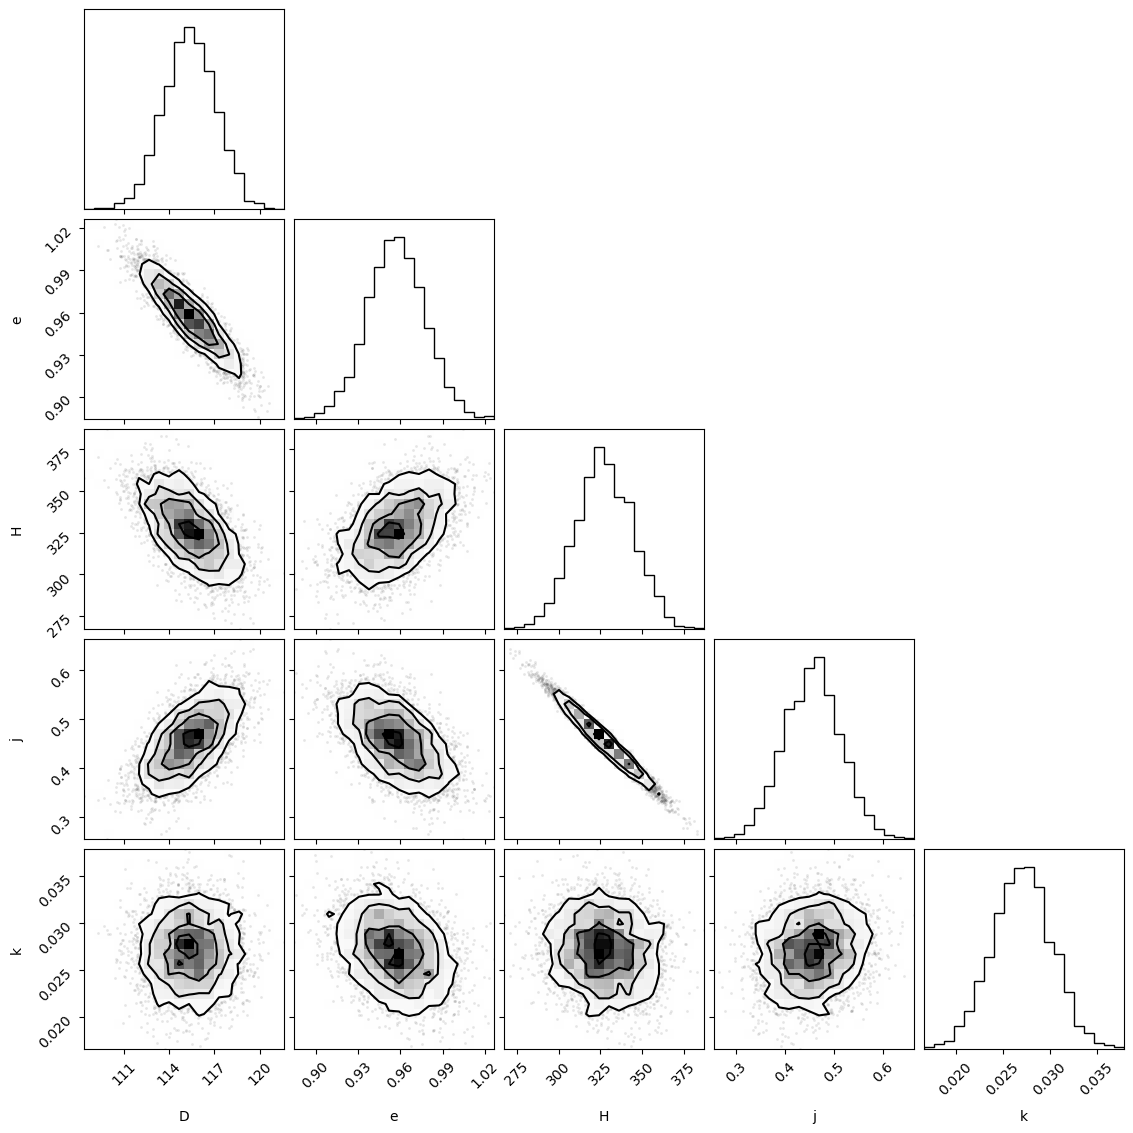

In [2]:
reload(read_mcmc)
read_mcmc.corner_plot('mcmc_samples.h5')
read_mcmc.estimate('mcmc_samples.h5')

# Now run only on disks
Also, I purposefully put the starting position in the wrong spot to check robustness

N/50 = 200;
tau: [136.0523969  114.85653509 219.78627971 231.92456078  58.07055529]


burn-in: 463
thin: 1

samples shape: (305184, 5)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

N/50 = 200;
tau: [136.0523969  114.85653509 219.78627971 231.92456078  58.07055529]


burn-in: 463
thin: 1

samples shape: (305184, 5)


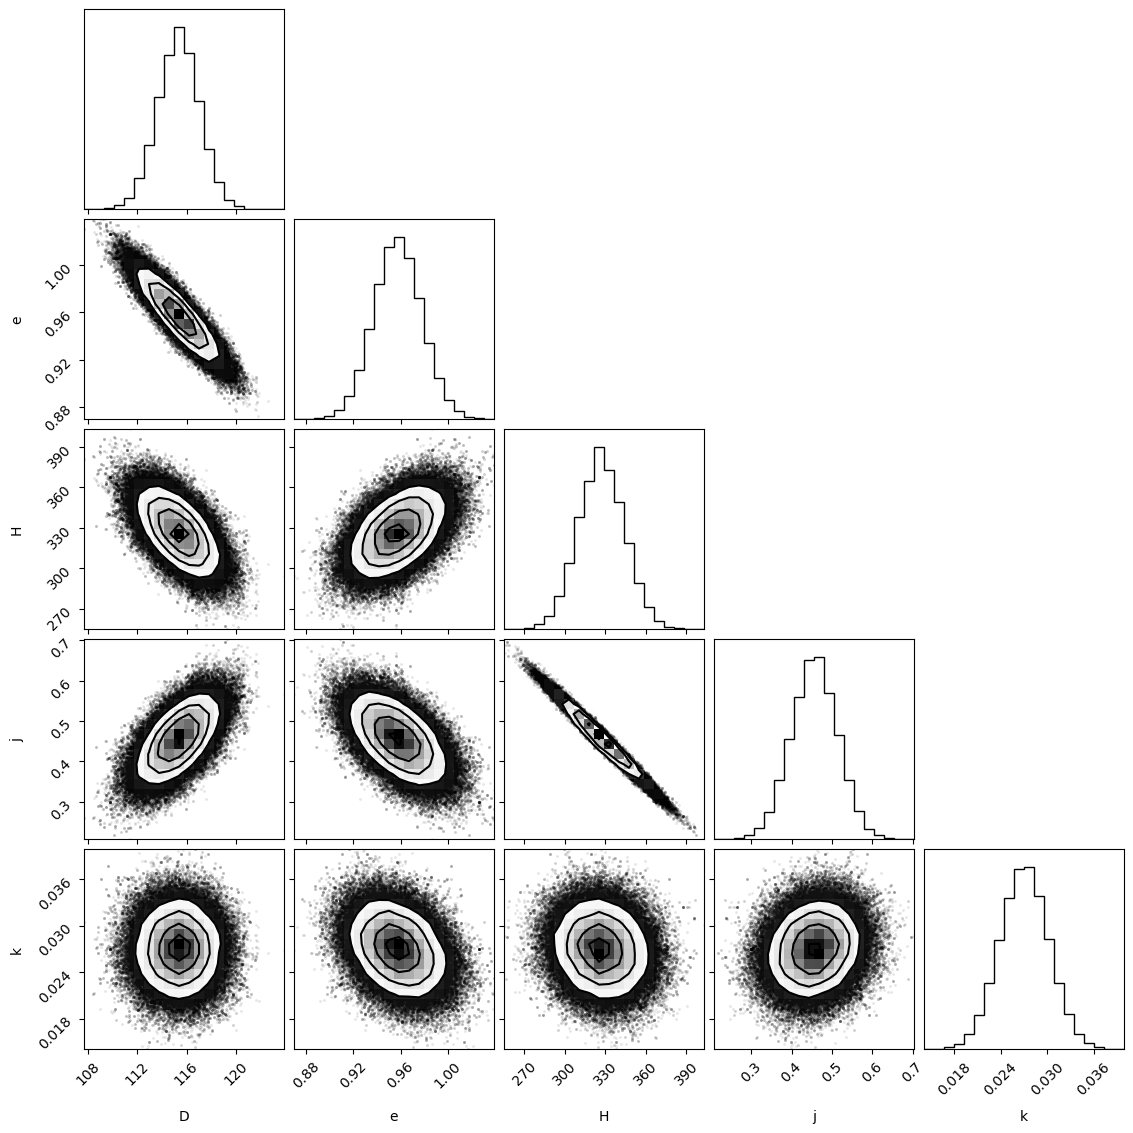

In [7]:
reload(read_mcmc)
read_mcmc.estimate('mcmc_samples_disks_gaussian_prior.h5')
read_mcmc.corner_plot('mcmc_samples_disks_gaussian_prior.h5')

## If I include pre-burn-in samples, we can see the algorithm finding the best estimate


samples shape: (160000, 5)


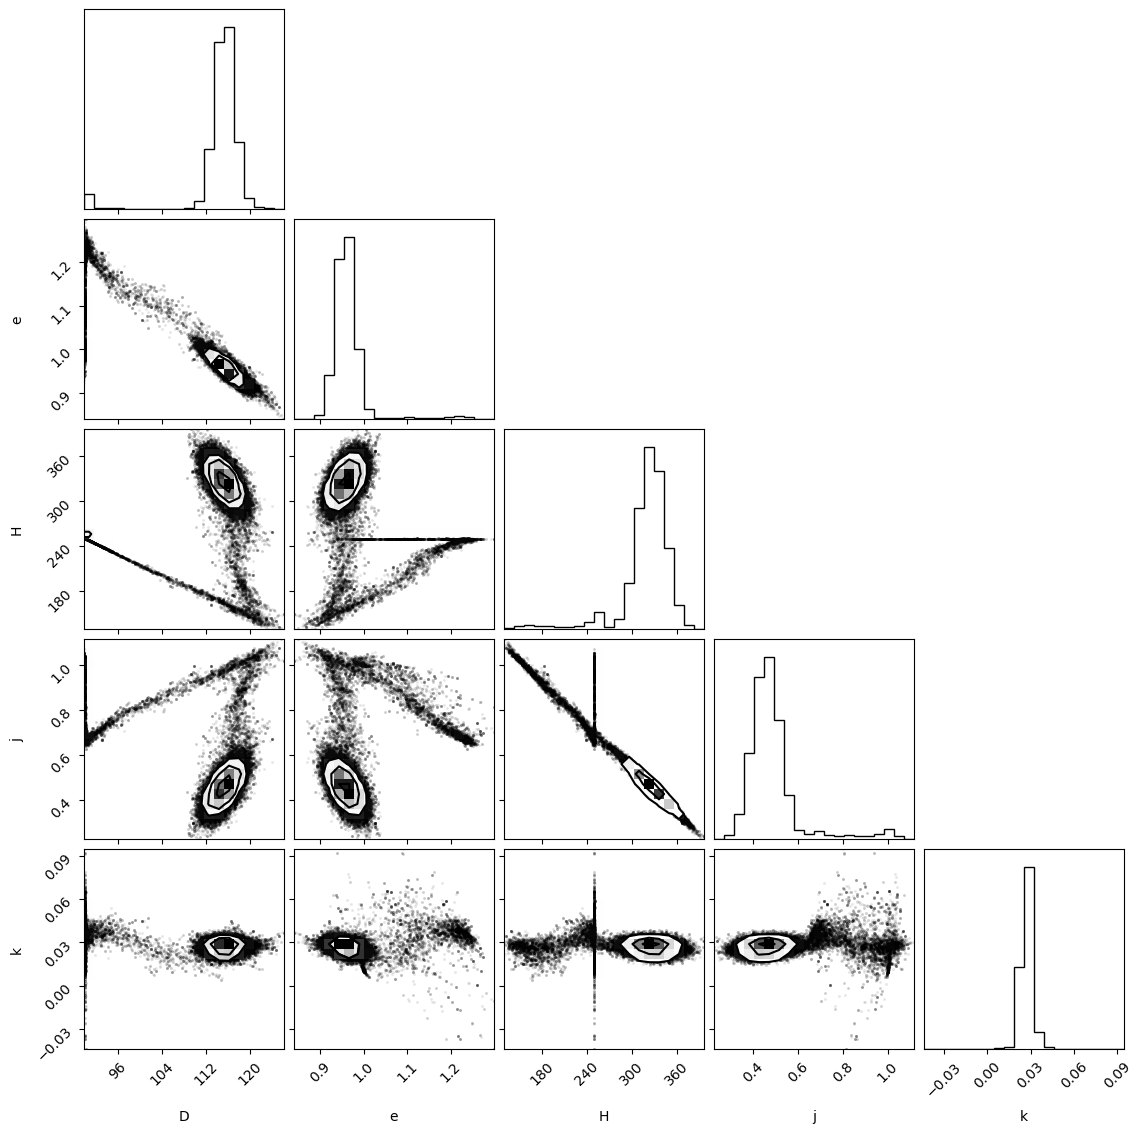

In [4]:
reload(read_mcmc)
read_mcmc.corner_plot('mcmc_samples_disks_gaussian_prior.h5', 
                      consider_burnin=False)

# Uniform priors

N/50 = 4;
tau: [23.61932548  9.28701779 23.79308858 15.99736369 11.29094269]


burn-in: 47
thin: 1

samples shape: (4928, 5)


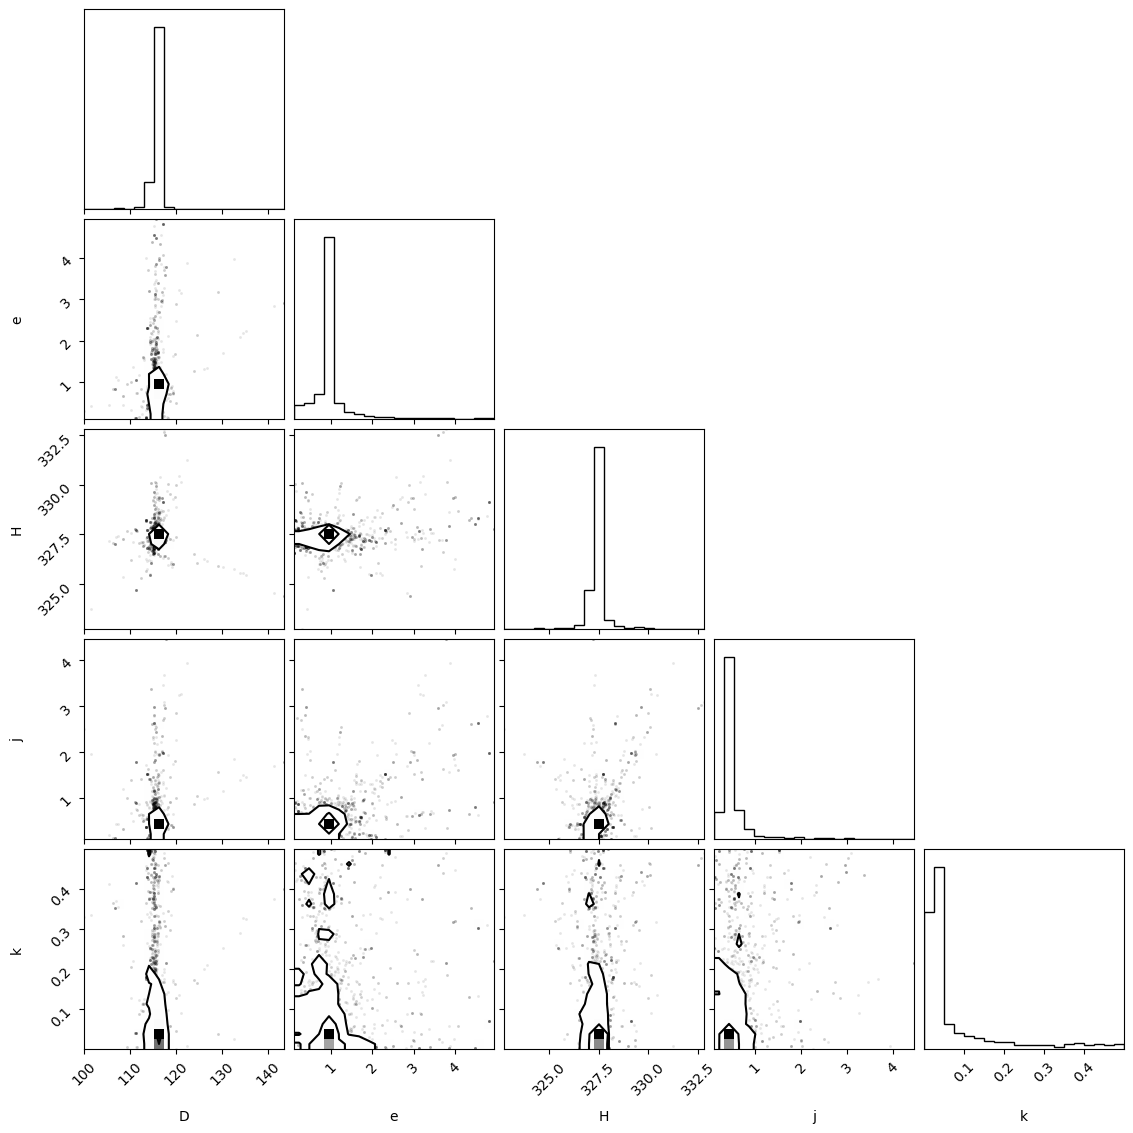

N/50 = 4;
tau: [23.61932548  9.28701779 23.79308858 15.99736369 11.29094269]


burn-in: 47
thin: 1

samples shape: (4928, 5)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
reload(read_mcmc)
read_mcmc.corner_plot('mcmc_samples_disks_uniform_prior.h5', 
                      consider_burnin=True)
read_mcmc.estimate('mcmc_samples_disks_uniform_prior.h5')

# Wide Gaussian prior

burn-in: 113
thin: 26

samples shape: (5984, 5)


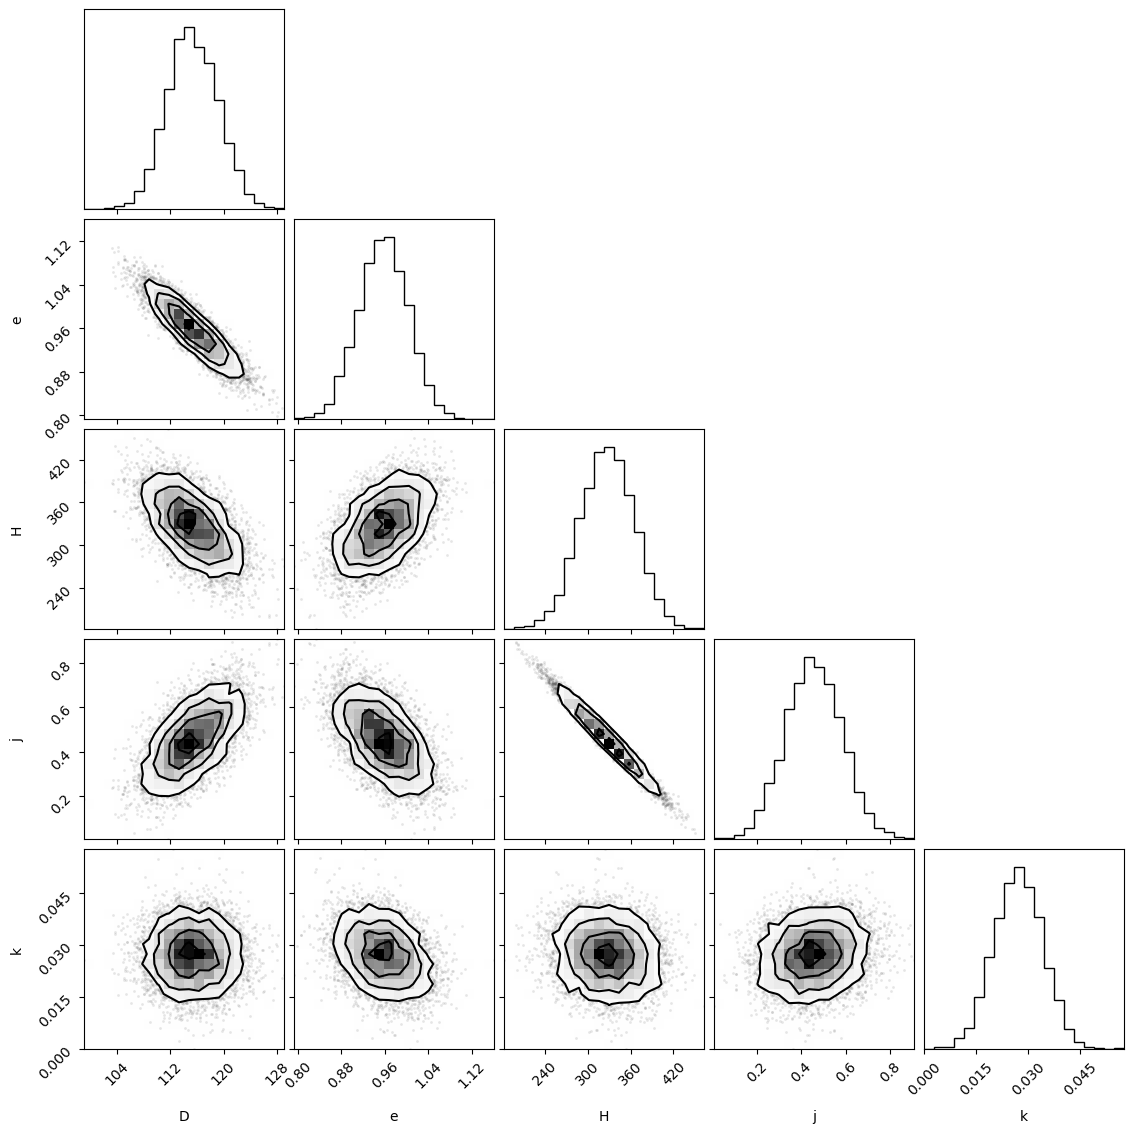

burn-in: 113
thin: 26

samples shape: (5984, 5)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
read_mcmc.corner_plot('mcmc_samples_disks_wide_gaussian_prior.h5', 
                      consider_burnin=True)
read_mcmc.estimate('mcmc_samples_disks_wide_gaussian_prior.h5')